In [21]:
import pickle

#imgs und gts
imgs_20xRenamed = []
with open('save_data/3D_images_Renamed/imgs_20xRenamed.pkl', 'rb') as f:
    imgs_20xRenamed = pickle.load(f)
gt_3D_relabelled = []
with open('save_data/gt_relabeled/gt_3D_relabelled.pkl', 'rb') as f:
    gt_3D_relabelled = pickle.load(f)

#masken
masks3D = []
with open('save_data/masks/masks3D.pkl', 'rb') as f:
    masks3D = pickle.load(f)
masks3D_nnUNet_Instances = []
with open('save_data/masks/masks3D_nnUNet_Instances_relabeled.pkl', 'rb') as f:
    masks3D_nnUNet_Instances = pickle.load(f)
masks3D_Deepcell = []
with open('save_data/masks/masks3D_Deepcell.pkl', 'rb') as f:
    masks3D_Deepcell = pickle.load(f)
masks3D_20xRenamed = []
with open('save_data/masks/20xRenamed/masks3D_CELLPOSE_RUN_1.pkl', 'rb') as f:
    masks3D_20xRenamed = pickle.load(f)

for i, gt in enumerate(gt_3D_relabelled):
    if masks3D[i].shape != gt.shape:
        print(masks3D[i].shape)
    if masks3D_nnUNet_Instances[i].shape != gt.shape:
        print(masks3D_nnUNet_Instances[i].shape)    

#Labels And IoUs
best_IoUs_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Cellpose.pkl', 'rb') as f:
    best_IoUs_3D_Cellpose = pickle.load(f)
best_labels_3D_Cellpose = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Cellpose.pkl', 'rb') as f:
    best_labels_3D_Cellpose = pickle.load(f)

best_IoUs_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_nnU.pkl', 'rb') as f:
    best_IoUs_3D_nnU = pickle.load(f)
best_labels_3D_nnU = []
with open('save_data/LabelsAndIoUs/best_labels_3D_nnU.pkl', 'rb') as f:
    best_labels_3D_nnU = pickle.load(f)

best_IoUs_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_IoUs_3D_Deepcell.pkl', 'rb') as f:
    best_IoUs_3D_Deepcell = pickle.load(f)
best_labels_3D_Deepcell = []
with open('save_data/LabelsAndIoUs/best_labels_3D_Deepcell.pkl', 'rb') as f:
    best_labels_3D_Deepcell = pickle.load(f)


In [5]:
print(len(imgs_20xRenamed))

22


In [6]:
img = masks3D_20xRenamed[5]
print(img.shape)

(17, 1024, 1024)


In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import regionprops
import numpy as np

binary = img[8,:,:] >= 1
plt.imshow(binary)
plt.show()
labeled, _ = label(binary)
props = regionprops(labeled)

sizes = [prop.area for prop in props]  
print(np.average(sizes))
diameters = [np.cbrt(p.area) for p in props]  
print(np.average(diameters))
diameters = [np.sqrt(p.area) for p in props]
print(np.average(diameters))

NameError: name 'img' is not defined

In [15]:
import re
import os
import tifffile as tif

imgs_20xRenamed = []
save_dir = "20xRenamed/20xRenamed"
image_ext = ".tif"
# Get all .tif files
image_files = [file for file in os.listdir(save_dir) if file.endswith(image_ext) if file.startswith('img')]

def extract_number(filename):
    match = re.match(r"img_(\d+)\.tif", filename)
    return int(match.group(1)) if match else float('inf')

image_files_sorted = sorted(image_files, key=extract_number)

# Load images in sorted order
for file in image_files_sorted:
    img = tif.imread(os.path.join(save_dir, file))
    print(f"image shape {img.shape} in {file}")
    imgs_20xRenamed.append(img)

image shape (28, 4, 1024, 1024) in img_001.tif
image shape (29, 4, 1024, 1024) in img_002.tif
image shape (16, 4, 1024, 1024) in img_003.tif
image shape (28, 4, 1024, 1024) in img_004.tif
image shape (33, 4, 1024, 1024) in img_005.tif
image shape (17, 4, 1024, 1024) in img_006.tif
image shape (20, 4, 1024, 1024) in img_007.tif
image shape (61, 4, 1024, 1024) in img_008.tif
image shape (20, 4, 1024, 1024) in img_009.tif
image shape (61, 4, 1024, 1024) in img_010.tif
image shape (61, 4, 1024, 1024) in img_011.tif
image shape (31, 4, 1024, 1024) in img_012.tif
image shape (15, 4, 1024, 1024) in img_013.tif
image shape (61, 4, 1024, 1024) in img_014.tif
image shape (15, 4, 1024, 1024) in img_015.tif
image shape (29, 4, 1024, 1024) in img_016.tif
image shape (43, 4, 1024, 1024) in img_017.tif
image shape (16, 4, 1024, 1024) in img_018.tif
image shape (20, 4, 1024, 1024) in img_019.tif
image shape (61, 4, 1024, 1024) in img_020.tif
image shape (61, 4, 1024, 1024) in img_021.tif
image shape (

In [38]:
from helpers.blob_data_helper import BlobDataHelper
blb = BlobDataHelper()

In [65]:
import importlib
import helpers.blob_data_helper
importlib.reload(helpers.blob_data_helper)

from helpers.blob_data_helper import BlobDataHelper, get_next_undef
blb = BlobDataHelper()


still at 0 == 0 -> Still img of shape (28, 1024, 1024) and mask of shape (28, 1024, 1024) which has 2375 indices. . The selected blob is 7
(np.int64(6), np.int64(30), np.int64(16), np.int64(30))
(9, 47, 47)
True


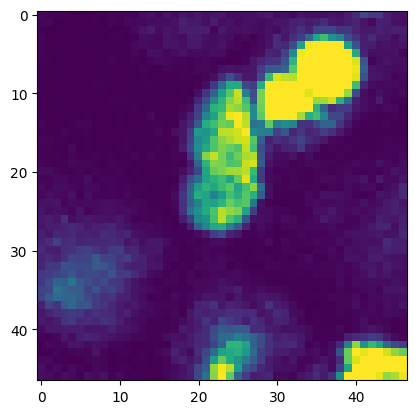

In [59]:
#from helpers.blob_data_helper import get_blob
#print(np.unique(masks3D_20xRenamed[3])) ->2128
import matplotlib.pyplot as plt
import numpy as np
slice = 3
bbox, blob_index, image_index, edge_blob, inside_box = blb.get_blob(image_index=0, blob_index=7)
print(inside_box)
print(bbox.shape)
print(edge_blob)
if 3 > bbox.shape[0]:
    slice = bbox.shape[0] - 1
if 1 == bbox.shape[0]:
    slice = 0
plt.imshow(bbox[slice,:,:])
plt.show()

In [ ]:
blobs_per_image = [len(np.unique(mask)) for mask in masks3D_20xRenamed]

In [62]:
print(len(blobs_per_image))
print(blobs_per_image[0])

22
2375


In [69]:
import json, os
def label_all_img0(blob_count):
    label_store = {"img0": {str(i): 1 for i in range(1, blob_count + 1)}}
    with open("label_store.json", "w") as f:
        json.dump(label_store, f, indent=2)
label_all_img0(2375)

In [70]:
SAVE_FILE = "label_store.json"
SAVE_INTERVAL = 3
save_counter = 0
# ---- Load Label Store ----
if os.path.exists(SAVE_FILE):
    with open(SAVE_FILE, 'r') as f:
        label_store = json.load(f)
    print(get_next_undef(label_store))

(0, 2374)


In [66]:
all_shapes = []
for k in range(len(masks3D_20xRenamed)):
    print(f"***************** IMAGE {k} *****************")
    shapes = []
    length = len(np.unique(masks3D_20xRenamed[k]))
    for i in range(1, length):
        if i % 100 == 0:
            print(f"iteration {i} von {length}")
        bbox, blob_index, image_index, edge_blob = blb.get_blob(image_index=0, blob_index=i, offset=0)
        if not edge_blob:
            shapes.append(bbox.shape)
    all_shapes.append(shapes)

***************** IMAGE 0 *****************
still at 0 == 0 -> Still img of shape (28, 1024, 1024) and mask of shape (28, 1024, 1024) which has 2375 indices. . The selected blob is 1


ValueError: too many values to unpack (expected 4)

In [33]:
import pickle 
with open('all_shapes.pkl', 'wb') as handle:
    pickle.dump(all_shapes, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [36]:
import numpy as np

for idx, shape_list in enumerate(all_shapes):
    x_sizes = [shape[1] for shape in shape_list]
    y_sizes = [shape[2] for shape in shape_list]

    x_sizes = np.array(x_sizes)
    y_sizes = np.array(y_sizes)

    top5_x = np.sort(x_sizes)[-5:][::-1]
    top5_y = np.sort(y_sizes)[-5:][::-1]

    mean_x = np.mean(x_sizes)
    mean_y = np.mean(y_sizes)

    print(f"Shape List {idx}:")
    print("  Top 5 X sizes:", top5_x)
    print("  Top 5 Y sizes:", top5_y)
    print("  Mean X size:", mean_x)
    print("  Mean Y size:", mean_y)
    print()


Shape List 0:
  Top 5 X sizes: [45 43 40 38 37]
  Top 5 Y sizes: [37 34 29 27 27]
  Mean X size: 13.611158798283261
  Mean Y size: 12.010729613733906

Shape List 1:
  Top 5 X sizes: [43 40 38 37 35]
  Top 5 Y sizes: [29 27 27 27 26]
  Mean X size: 14.515286624203823
  Mean Y size: 12.538853503184713

Shape List 2:
  Top 5 X sizes: [43 40 38 37 35]
  Top 5 Y sizes: [26 24 24 24 23]
  Mean X size: 16.087968952134542
  Mean Y size: 13.364812419146183

Shape List 3:
  Top 5 X sizes: [45 43 40 38 37]
  Top 5 Y sizes: [37 29 27 27 27]
  Mean X size: 13.875598086124402
  Mean Y size: 12.224401913875598

Shape List 4:
  Top 5 X sizes: [45 43 40 38 37]
  Top 5 Y sizes: [37 34 29 27 27]
  Mean X size: 13.74176276771005
  Mean Y size: 12.1000823723229

Shape List 5:
  Top 5 X sizes: [43 38 37 34 34]
  Top 5 Y sizes: [26 24 24 24 23]
  Mean X size: 16.838383838383837
  Mean Y size: 13.858585858585858

Shape List 6:
  Top 5 X sizes: [43 40 38 37 35]
  Top 5 Y sizes: [26 24 24 24 24]
  Mean X size: 

Rand Blob!
i: 0, y_max: 1024, x_max: 1024
Rand Blob!
Rand Blob!
Rand Blob!
Rand Blob!
Rand Blob!
i: 68, y_max: 1024, x_max: 532
Rand Blob!
Rand Blob!
i: 73, y_max: 1024, x_max: 16
Rand Blob!
Rand Blob!
Rand Blob!
i: 122, y_max: 1024, x_max: 413
Rand Blob!
i: 145, y_max: 1024, x_max: 634
Rand Blob!
i: 149, y_max: 1024, x_max: 666
Rand Blob!
Rand Blob!
Rand Blob!
Rand Blob!
Rand Blob!


: 

In [ ]:

images3D_20xRenameda = []
for im in images3D_20xRenamed_full:
    images3D_20xRenamed.append(im[:,0,:,:])